In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from moepy import lowess, eda

In [85]:
df = pd.read_excel('wikipedia_polling_table.xlsx')
electionday = np.datetime64('2023-02-28')
#df['date_delta'] = (df['StartDate'] - df['StartDate'].min())  / np.timedelta64(1,'D')
df['date_delta'] = (df['StartDate']- electionday)  / np.timedelta64(1,'D')
# percentages are 0-100 decimals
df.head()

,Pollster,538rating,Sponsor,StartDate,SampleSize,VoterGroup,MOE,Kam Buckner,Chuy García,Ja'Mal Green,Brandon Johnson,Sophia King,Lori Lightfoot,Raymond Lopez,Roderick Sawyer,Paul Vallas,Willie Wilson,Other,Undecided,date_delta
0,GBAO,B/C,Lori Lightfoot campaign,2023-02-05,501,(LV),± 4.4%,0.00,13.00,0.00,15.00,0.00,24.00,0,0.00,20.00,14.00,0.00,7.00,-23.0
1,Mason–Dixon,B/C,"Telemundo Chicago (WSNS),_x000D_\nNBC 5 (WMAQ-...",2023-01-31,625,(RV),± 4%,1.00,20.00,2.00,11.00,1.00,17.00,0,0.00,18.00,12.00,0.00,18.00,-28.0
2,IZQ Strategies (D),—,—,2023-01-27,"1,040",(LV),± 3%,5.00,12.00,2.00,15.00,2.00,12.00,0,1.00,25.00,11.00,0.00,16.00,-32.0
3,Cor Strategies (R),—,—,2023-01-26,614,(LV),± 3.95%,1.00,13.00,3.00,7.00,3.00,23.00,0,1.00,21.00,8.00,0.00,20.00,-33.0
4,1983 Labs,—,—,2023-01-23,554,NaN,± 4.25%,6.07,7.46,5.97,9.36,6.17,16.28,0,1.34,10.23,13.86,1.35,21.92,-36.0


C:\Users\micku\miniconda3\envs\main\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='date_delta', ylabel='Chuy García'>

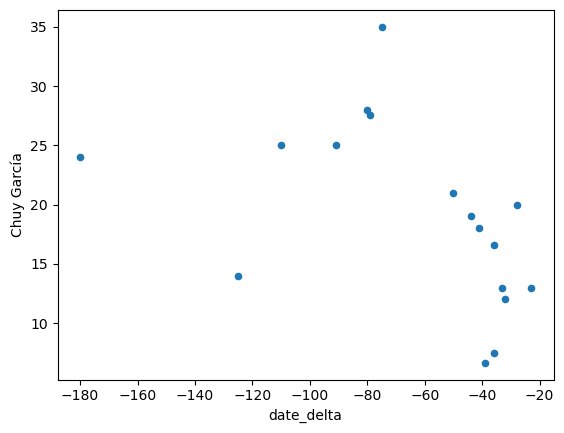

In [86]:
chuy = df[['date_delta','Chuy García']].copy()
chuy.plot(kind='scatter', x='date_delta', y='Chuy García')

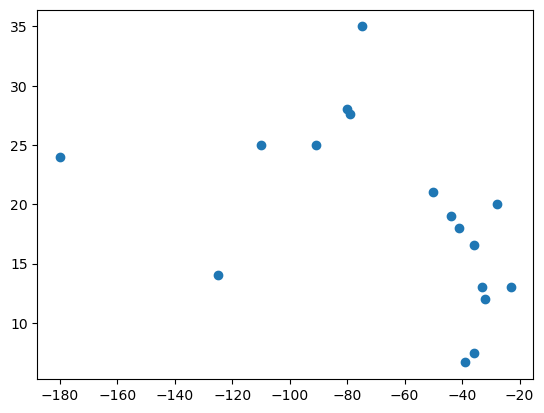

In [87]:
chuy_x = chuy['date_delta'].to_numpy()
chuy_y = chuy['Chuy García'].to_numpy()
plt.scatter(chuy_x, chuy_y)

In [88]:
#https://ayrtonb.github.io/Merit-Order-Effect/ug-08-lowess-quick-start/
lowess_model = lowess.Lowess()
reg_anchors = np.array(2.5)
#lowess_model.fit(chuy_x, chuy_y, frac=1, num_fits=1, reg_anchors=reg_anchors)
#lowess_model.fit(chuy_x, chuy_y)
lowess_model.fit(chuy_x, chuy_y, frac=1)

#x_pred = np.arange('2023-02', '2023-03', dtype='datetime64[D]')
x_pred = np.linspace(chuy_x.min(), 0, 14)
print(x_pred)
y_pred = lowess_model.predict(x_pred)

[-180.         -166.15384615 -152.30769231 -138.46153846 -124.61538462
 -110.76923077  -96.92307692  -83.07692308  -69.23076923  -55.38461538
  -41.53846154  -27.69230769  -13.84615385    0.        ]


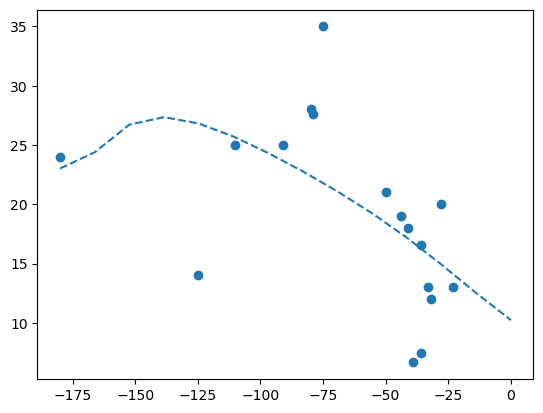

In [89]:
plt.scatter(chuy_x, chuy_y)
plt.plot(x_pred, y_pred, '--')

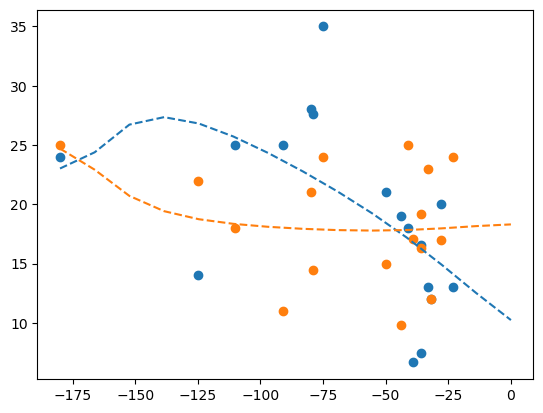

In [90]:
df_x = chuy['date_delta'].to_numpy()
chuy_y = df['Chuy García'].to_numpy()
lori_y = df['Lori Lightfoot'].to_numpy()

lowess_model = lowess.Lowess()
lowess_model.fit(df_x, chuy_y, frac=1)
x_pred = np.linspace(chuy_x.min(), 0, 14)

chuy_y_pred = lowess_model.predict(x_pred)

lowess_model.fit(df_x, lori_y, frac=1)

lori_y_pred = lowess_model.predict(x_pred)


plt.scatter(df_x, chuy_y)
plt.scatter(df_x, lori_y)

plt.plot(x_pred, chuy_y_pred, '--')
plt.plot(x_pred, lori_y_pred, '--')

In [32]:
lowess_model.design_matrix

array([[7.37149164, 0.02888995]])

In [106]:
candidates = ['Kam Buckner', 'Chuy García', "Ja'Mal Green", 'Brandon Johnson', 'Sophia King', 'Lori Lightfoot', 
'Raymond Lopez', 'Roderick Sawyer', 'Paul Vallas', 'Willie Wilson', 'Other', 'Undecided']
colors = ['#7b4a4a', '#ff9100', '#d8dc6a', '#34d513', '#1fa3dd', '#ff00ff',
          '#20b2aa', '#4169e1', '#9370db', '#ff0000', '#eeeeee', '#bfbfbf']

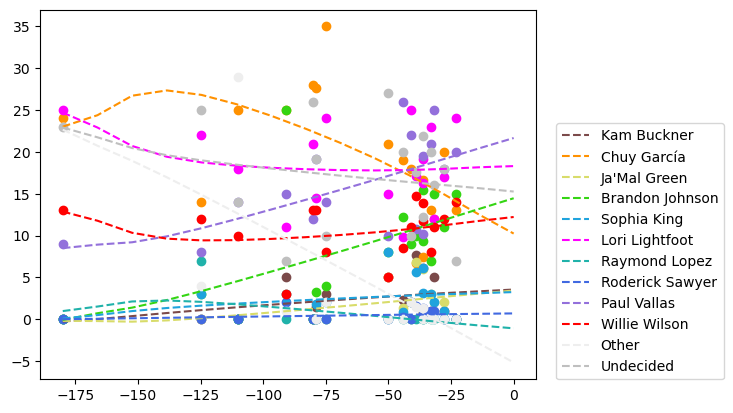

In [107]:
df_x = chuy['date_delta'].to_numpy()
lowess_model = lowess.Lowess()
x_pred = np.linspace(df_x.min(), 0, 14)


for i, c in enumerate(candidates):
    y = df[c].to_numpy()

    lowess_model.fit(df_x, y, frac=1)
    y_pred = lowess_model.predict(x_pred)

    plt.scatter(df_x, y, color = colors[i])
    plt.plot(x_pred, y_pred, '--', label = c, color = colors[i])

plt.legend(loc=(1.04, 0))

In [108]:
class ChiMayor:
    candidates = ['Kam Buckner', 'Chuy García', "Ja'Mal Green", 
        'Brandon Johnson', 'Sophia King', 'Lori Lightfoot', 
        'Raymond Lopez', 'Roderick Sawyer', 'Paul Vallas', 
        'Willie Wilson', 'Other', 'Undecided']
    colors = ['#7b4a4a', '#ff9100', '#d8dc6a', 
        '#34d513', '#1fa3dd', '#ff00ff',
        '#20b2aa', '#4169e1', '#9370db', 
        '#ff0000', '#eeeeee', '#bfbfbf']
    
    def __init__(self, fp = 'wikipedia_polling_table.xlsx', frac = 1) -> None:
        self.df = pd.read_excel(fp)
        electionday = np.datetime64('2023-02-28')
        self.df['date_delta'] = (df['StartDate']- electionday)  / np.timedelta64(1,'D')
        self.x = df['date_delta'].to_numpy()
        self.x_pred = np.linspace(self.x.min(), 0, 14)
        self.model = lowess.Lowess()
        self.frac = frac


    def plot(self):
        for i, c in enumerate(self.candidates):
            y = df[c].to_numpy()

            lowess_model.fit(self.x, y, frac=self.frac)
            y_pred = lowess_model.predict(self.x_pred)

            c_color = self.colors[i]
            plt.scatter(self.x, y, color = c_color)
            plt.plot(self.x_pred, y_pred, '--', label = c, color = c_color)

        plt.legend(loc=(1.04, 0))

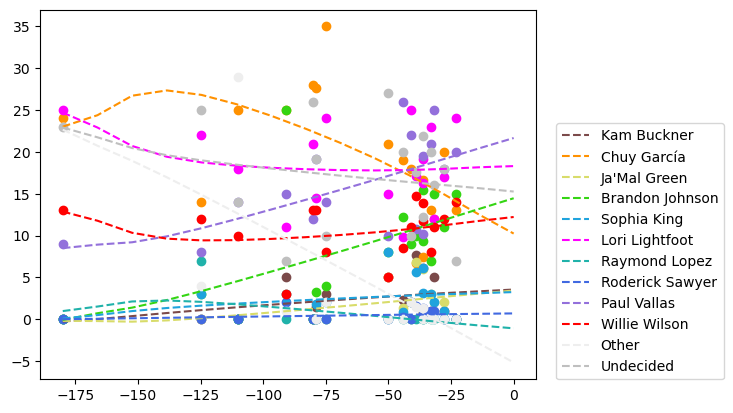

In [111]:
plot1 = ChiMayor()
plot1.plot()


C:\Users\micku\miniconda3\envs\main\lib\site-packages\moepy\lowess.py:185: RuntimeWarning: divide by zero encountered in divide
  cleaned_residuals = np.clip(residuals / (max_std_dev * std_dev), -1, 1)
C:\Users\micku\miniconda3\envs\main\lib\site-packages\moepy\lowess.py:185: RuntimeWarning: invalid value encountered in divide
  cleaned_residuals = np.clip(residuals / (max_std_dev * std_dev), -1, 1)


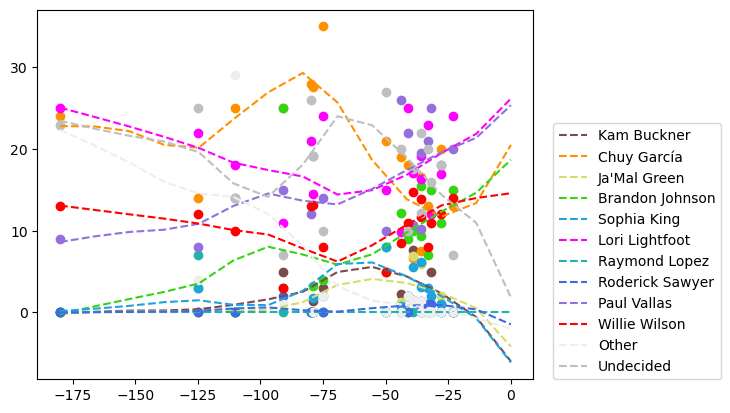

In [112]:
plot2 = ChiMayor(frac=0.5)
plot2.plot()